In [1]:
from quantopian.research import symbols, run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import Fundamentals, USEquityPricing
from quantopian.pipeline.filters import Q1500US
from quantopian.pipeline.factors import DailyReturns, AverageDollarVolume

In [2]:
def make_pipeline():
    prices = USEquityPricing.close.latest
    pe_ratio = Fundamentals.pe_ratio.latest
    eps = Fundamentals.basic_eps_earnings_reports.latest
    
    positive_eps = (eps > 0)
    market_cap_10B = Q1500US(10000000000)
    large_cap_pos_earnings = positive_eps & market_cap_10B    
        
    dollar_volume_traded_1w = AverageDollarVolume(window_length=6, mask=large_cap_pos_earnings)
    high_volume = dollar_volume_traded_1w.percentile_between(75, 100)
    
#     daily_returns = DailyReturns()
        
    return Pipeline(
        columns= {
            'Price': prices,
            'P/E Ratio': pe_ratio
        },
        screen=high_volume
    )

In [3]:
# Generate pipeline for notebook research
df = run_pipeline(make_pipeline(), '2019-09-16', '2019-10-16')
df

P/E Ratio     Price
2019-09-16 00:00:00+00:00 Equity(24 [AAPL])         18.569610   218.800
                          Equity(62 [ABT])          52.018519    84.260
                          Equity(67 [ADSK])        590.307692   153.480
                          Equity(114 [ADBE])        52.028037   278.350
                          Equity(337 [AMAT])        16.353503    51.350
                          Equity(351 [AMD])        170.500000    30.710
                          Equity(368 [AMGN])        15.464399   195.450
                          Equity(679 [AXP])         14.752475   119.170
                          Equity(700 [BAC])         10.736655    30.130
                          Equity(980 [BMY])         13.042216    49.420
                          Equity(1267 [CAT])        12.410019   133.770
                          Equity(1335 [C])           9.776389    70.380
                          Equity(1539 [CI])         14.907322   160.850
                          Equity(1637 [CMCS_A])     17.893130    46.890
                          Equity(1787 [COST])       35.859951   291.960
                          Equity(1900 [CSCO])       19.168582    50.040
                          Equity(1937 [CSX])        17.462651    72.500
                          Equity(2127 [DE])         16.075802   165.380
                          Equity(2170 [DHR])        41.233918   141.000
                          Equity(2190 [DIS])        18.329349   138.000
                          Equity(2564 [EOG])        12.908943    79.380
                          Equity(2673 [F])          17.500000     9.460
                          Equity(2853 [FISV])       43.109244   102.570
                          Equity(2968 [NEE])        31.573699   218.460
                          Equity(3212 [GILD])       14.367171    66.520
                          Equity(3443 [HAL])        13.423841    20.260
                          Equity(3496 [HD])         23.304781   233.980
                          Equity(3766 [IBM])        14.857291   143.650
                          Equity(3806 [BIIB])        8.816319   236.640
                          Equity(3951 [INTC])       12.247086    52.540
...                                                       ...       ...
2019-10-16 00:00:00+00:00 Equity(23112 [CVX])       15.066062   116.310
                          Equity(23709 [NFLX])     111.909449   284.270
                          Equity(23998 [COP])        9.038772    55.530
                          Equity(24760 [AMT])       67.737160   224.100
                          Equity(25006 [JPM])       12.240816   119.920
                          Equity(25010 [USB])       12.619718    53.760
                          Equity(25090 [HON])       17.353128   163.640
                          Equity(25555 [ACN])       25.407609   186.230
                          Equity(26401 [CRM])      127.283333   152.730
                          Equity(26466 [DPZ])       28.573184   255.720
                          Equity(26578 [GOOG_L])    25.085622  1242.240
                          Equity(26882 [LVS])       22.924000    57.310
                          Equity(28016 [CMG])       93.416949   826.810
                          Equity(28051 [UAL])        8.949084    87.910
                          Equity(32146 [MA])        42.921418   278.480
                          Equity(33729 [DAL])        7.576271    53.640
                          Equity(34395 [LULU])      50.467822   203.940
                          Equity(34953 [ULTA])      20.796610   245.320
                          Equity(35902 [PM])        15.570577    78.320
                          Equity(35920 [V])         34.375000   178.690
                          Equity(38650 [AVGO])      40.322222   290.390
                          Equity(39095 [CHTR])      73.625850   433.040
                          Equity(39994 [NXPI])      17.306028   111.955
                          Equity(40430 [GM])         5.773885    36.250
                    

In [4]:
# Choose subset of stocks that were chosen during my class simulation
stock_choices = ['DIS', 'GS', 'FB', 'V', 'AAPL', 'AMZN', 'NKE', 'GOOG', 'LMT']
simulation_df = df.loc[(slice('2019-09-16','2019-09-20'), symbols(stock_choices)), :]

simulation_df

P/E Ratio    Price
2019-09-16 00:00:00+00:00 Equity(24 [AAPL])     18.569610   218.80
                          Equity(2190 [DIS])    18.329349   138.00
                          Equity(5328 [NKE])    35.068273    87.34
                          Equity(16841 [AMZN])  76.289506  1839.34
                          Equity(20088 [GS])     9.216262   219.91
                          Equity(35920 [V])     34.090385   177.28
                          Equity(42950 [FB])    31.727119   187.12
2019-09-17 00:00:00+00:00 Equity(24 [AAPL])     18.667233   219.90
                          Equity(2190 [DIS])    18.034529   135.80
                          Equity(5328 [NKE])    35.048193    87.24
                          Equity(12691 [LMT])   19.135478   392.70
                          Equity(16841 [AMZN])  74.982995  1808.23
                          Equity(20088 [GS])     9.103940   217.12
                          Equity(35920 [V])     33.867308   176.12
                          Equity(42950 [FB])    31.562712   186.24
2019-09-18 00:00:00+00:00 Equity(24 [AAPL])     18.735144   220.65
                          Equity(2190 [DIS])    18.102258   136.21
                          Equity(5328 [NKE])    35.176707    87.56
                          Equity(12691 [LMT])   19.199805   393.98
                          Equity(16841 [AMZN])  75.593115  1822.62
                          Equity(20088 [GS])     9.049036   215.86
                          Equity(35920 [V])     33.932692   176.42
                          Equity(42950 [FB])    31.877966   188.11
2019-09-19 00:00:00+00:00 Equity(24 [AAPL])     18.910866   222.77
                          Equity(2190 [DIS])    18.167331   136.79
                          Equity(5328 [NKE])    35.373494    88.07
                          Equity(12691 [LMT])   19.348928   397.03
                          Equity(16841 [AMZN])  75.381999  1817.59
                          Equity(20088 [GS])     9.098072   217.08
                          Equity(35920 [V])     33.709615   175.32
                          Equity(42950 [FB])    31.888136   188.13
2019-09-20 00:00:00+00:00 Equity(24 [AAPL])     18.757216   220.95
                          Equity(2190 [DIS])    17.702523   133.30
                          Equity(5328 [NKE])    35.220884    87.68
                          Equity(12691 [LMT])   19.173002   393.25
                          Equity(16841 [AMZN])  75.549565  1821.54
                          Equity(20088 [GS])     9.020536   215.21
                          Equity(35920 [V])     33.838462   175.92
                          Equity(42950 [FB])    32.227119   190.15

In [5]:
# Create dataframes for each stock to determine if its data passed through the pipeline filters
for ticker in stock_choices:
    print(ticker)
    print(simulation_df.loc[(slice(None), symbols(ticker)), :])

DIS
                                              P/E Ratio   Price
2019-09-16 00:00:00+00:00 Equity(2190 [DIS])  18.329349  138.00
2019-09-17 00:00:00+00:00 Equity(2190 [DIS])  18.034529  135.80
2019-09-18 00:00:00+00:00 Equity(2190 [DIS])  18.102258  136.21
2019-09-19 00:00:00+00:00 Equity(2190 [DIS])  18.167331  136.79
2019-09-20 00:00:00+00:00 Equity(2190 [DIS])  17.702523  133.30
GS
                                              P/E Ratio   Price
2019-09-16 00:00:00+00:00 Equity(20088 [GS])   9.216262  219.91
2019-09-17 00:00:00+00:00 Equity(20088 [GS])   9.103940  217.12
2019-09-18 00:00:00+00:00 Equity(20088 [GS])   9.049036  215.86
2019-09-19 00:00:00+00:00 Equity(20088 [GS])   9.098072  217.08
2019-09-20 00:00:00+00:00 Equity(20088 [GS])   9.020536  215.21
FB
                                              P/E Ratio   Price
2019-09-16 00:00:00+00:00 Equity(42950 [FB])  31.727119  187.12
2019-09-17 00:00:00+00:00 Equity(42950 [FB])  31.562712  186.24
2019-09-18 00:00:00+00:00 Equi

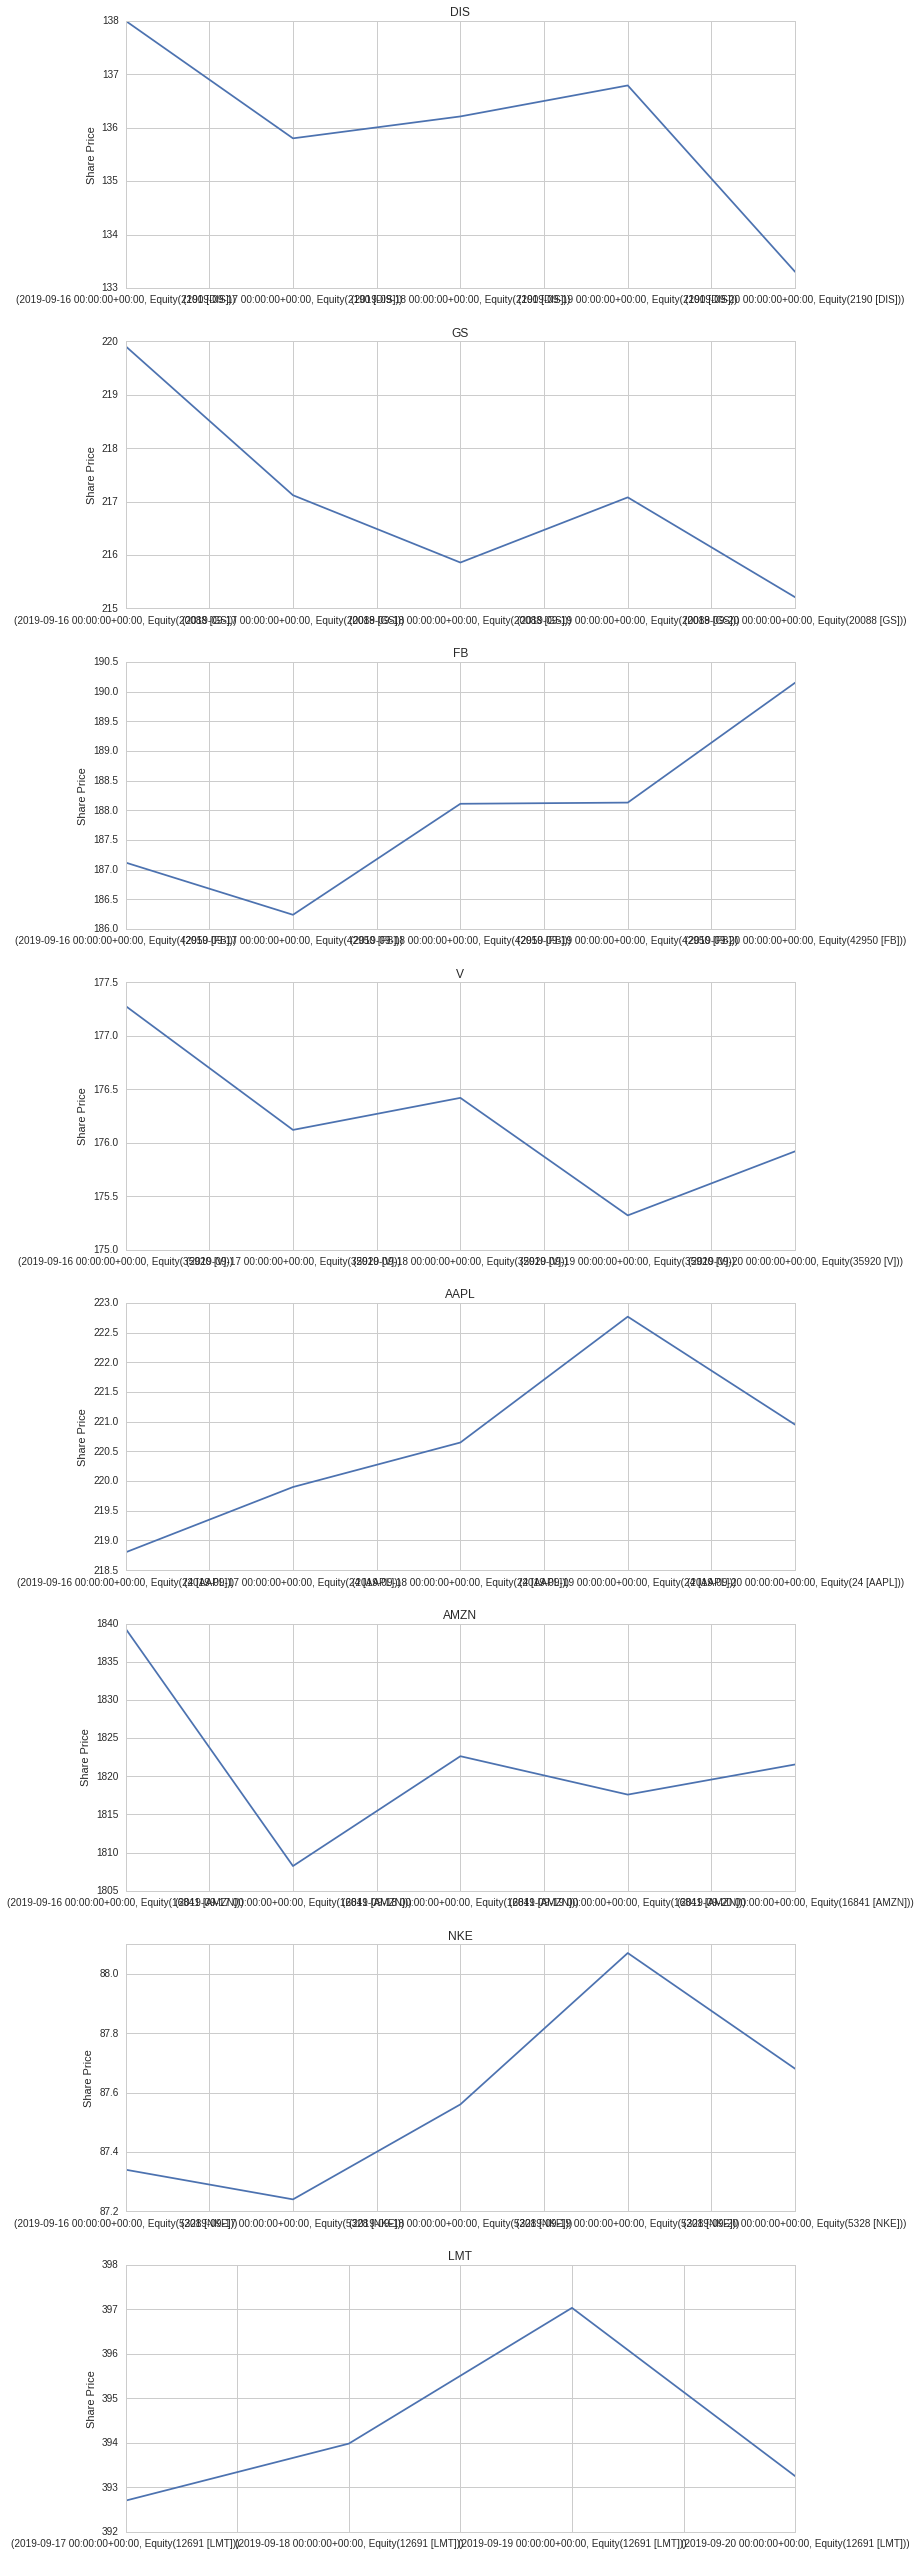

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 45))

# Remove Google stock since its data failed to meet filter criteria
stock_choices.remove('GOOG')

# Plot individual line graphs of each stock's price
for i, ticker in enumerate(stock_choices):
    plt.subplot(len(stock_choices), 1, (i+1))
    plt.title(ticker)
    plt.ylabel('Share Price')
    simulation_df.loc[(slice('2019-09-16','2019-09-20'), symbols(ticker)), 'Price'].plot()